In [38]:
import imageio
import os

def extract_and_save_frames_from_gif(gif_path, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Use imageio's get_reader to read the GIF file frame by frame
    with imageio.get_reader(gif_path) as reader:
        # Loop through each frame in the gif
        for i, frame in enumerate(reader):
            # Construct the filename for each frame
            frame_filename = f"frame_{i}.png"
            frame_path = os.path.join(output_folder, frame_filename)

            # Save each frame
            imageio.imwrite(frame_path, frame)

            print(f"Frame {i} saved as {frame_filename}")

# Usage
gif_path = 'Output/Output_3_Dataset_2/TEM_Data_img.gif'  
output_folder = 'Output/Output_3_Dataset_2/frames'  # Replace with your desired output path

extract_and_save_frames_from_gif(gif_path, output_folder)


Frame 0 saved as frame_0.png
Frame 1 saved as frame_1.png
Frame 2 saved as frame_2.png
Frame 3 saved as frame_3.png
Frame 4 saved as frame_4.png
Frame 5 saved as frame_5.png
Frame 6 saved as frame_6.png
Frame 7 saved as frame_7.png
Frame 8 saved as frame_8.png
Frame 9 saved as frame_9.png
Frame 10 saved as frame_10.png
Frame 11 saved as frame_11.png
Frame 12 saved as frame_12.png
Frame 13 saved as frame_13.png
Frame 14 saved as frame_14.png
Frame 15 saved as frame_15.png
Frame 16 saved as frame_16.png
Frame 17 saved as frame_17.png
Frame 18 saved as frame_18.png
Frame 19 saved as frame_19.png
Frame 20 saved as frame_20.png
Frame 21 saved as frame_21.png
Frame 22 saved as frame_22.png
Frame 23 saved as frame_23.png
Frame 24 saved as frame_24.png
Frame 25 saved as frame_25.png
Frame 26 saved as frame_26.png
Frame 27 saved as frame_27.png
Frame 28 saved as frame_28.png
Frame 29 saved as frame_29.png


In [39]:
import cv2
import numpy as np
from skimage.restoration import denoise_wavelet, denoise_nl_means, estimate_sigma
from skimage.filters import median
from tqdm import tqdm
import os

def denoise_images(input_folder, output_base_folder):
   
    if not os.path.exists(output_base_folder):
        os.makedirs(output_base_folder)

    
    files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    
    denoising_methods = {
        'wavelet': denoise_wavelet,
        'gaussian_blur': lambda img: cv2.GaussianBlur(img, (5, 5), 0),
        'median_filter': lambda img: median(img),
        'bilateral_filter': lambda img: cv2.bilateralFilter(img, 9, 75, 75),
        'non_local_means': lambda img: denoise_nl_means(img, h=1.15 * np.std(img))
    }

   
    for file in tqdm(files):
        # Read the image
        img_path = os.path.join(input_folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        for method_name, denoising_function in denoising_methods.items():
          
            denoised_img = denoising_function(img)

            # Create a subfolder for the method if it doesn't exist
            output_folder = os.path.join(output_base_folder, method_name)
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)

            # Save the denoised image
            denoised_img_path = os.path.join(output_folder, file)
            cv2.imwrite(denoised_img_path, (denoised_img * 255).astype('uint8'))

            print(f"Denoised image using {method_name} saved to {denoised_img_path}")


input_folder = 'Output/Output_3_Dataset_2/frames' 
output_base_folder = 'Output/Output_3_Dataset_2/Denoised_frames'  

denoise_images(input_folder, output_base_folder)


  0%|          | 0/30 [00:00<?, ?it/s]

Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_1.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_1.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_1.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_1.png


  3%|▎         | 1/30 [00:15<07:33, 15.64s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_1.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_22.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_22.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_22.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_22.png


  7%|▋         | 2/30 [00:31<07:22, 15.80s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_22.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_11.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_11.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_11.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_11.png


 10%|█         | 3/30 [00:47<07:05, 15.75s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_11.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_19.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_19.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_19.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_19.png


 13%|█▎        | 4/30 [01:02<06:48, 15.73s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_19.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_21.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_21.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_21.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_21.png


 17%|█▋        | 5/30 [01:18<06:34, 15.78s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_21.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_15.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_15.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_15.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_15.png


 20%|██        | 6/30 [01:34<06:17, 15.73s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_15.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_14.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_14.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_14.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_14.png


 23%|██▎       | 7/30 [01:50<06:01, 15.72s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_14.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_13.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_13.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_13.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_13.png


 27%|██▋       | 8/30 [02:05<05:46, 15.76s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_13.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_16.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_16.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_16.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_16.png


 30%|███       | 9/30 [02:21<05:31, 15.77s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_16.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_23.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_23.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_23.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_23.png


 33%|███▎      | 10/30 [02:37<05:14, 15.71s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_23.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_17.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_17.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_17.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_17.png


 37%|███▋      | 11/30 [02:53<04:58, 15.71s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_17.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_2.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_2.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_2.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_2.png


 40%|████      | 12/30 [03:08<04:43, 15.74s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_2.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_25.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_25.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_25.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_25.png


 43%|████▎     | 13/30 [03:24<04:26, 15.69s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_25.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_12.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_12.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_12.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_12.png


 47%|████▋     | 14/30 [03:40<04:11, 15.73s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_12.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_24.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_24.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_24.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_24.png


 50%|█████     | 15/30 [03:55<03:55, 15.72s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_24.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_29.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_29.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_29.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_29.png


 53%|█████▎    | 16/30 [04:11<03:39, 15.68s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_29.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_6.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_6.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_6.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_6.png


 57%|█████▋    | 17/30 [04:27<03:23, 15.65s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_6.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_28.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_28.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_28.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_28.png


 60%|██████    | 18/30 [04:42<03:08, 15.70s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_28.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_10.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_10.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_10.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_10.png


 63%|██████▎   | 19/30 [04:58<02:52, 15.71s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_10.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_27.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_27.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_27.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_27.png


 67%|██████▋   | 20/30 [05:14<02:36, 15.69s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_27.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_8.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_8.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_8.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_8.png


 70%|███████   | 21/30 [05:29<02:21, 15.67s/it]

Denoised image using non_local_means saved to Output/Output_3_Dataset_2/Denoised_frames/non_local_means/frame_8.png
Denoised image using wavelet saved to Output/Output_3_Dataset_2/Denoised_frames/wavelet/frame_9.png
Denoised image using gaussian_blur saved to Output/Output_3_Dataset_2/Denoised_frames/gaussian_blur/frame_9.png
Denoised image using median_filter saved to Output/Output_3_Dataset_2/Denoised_frames/median_filter/frame_9.png
Denoised image using bilateral_filter saved to Output/Output_3_Dataset_2/Denoised_frames/bilateral_filter/frame_9.png


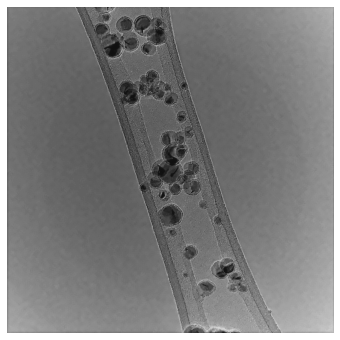

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Load a pre-trained model from TensorFlow Hub
model = hub.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')

def enhance_image(image_path, save_path):
    pil_image = Image.open(image_path).convert('L')
    original_size = pil_image.size  
    image = np.array(pil_image)
    rgb_image = np.stack((image,) * 3, axis=-1)
    
    # Convert to TensorFlow tensor and preprocess
    rgb_image = tf.cast(rgb_image, tf.float32) / 255.0
    rgb_image = tf.expand_dims(rgb_image, 0)

    # Apply the model
    enhanced_image = model(rgb_image)
    enhanced_image = tf.squeeze(enhanced_image, 0)

    # Resize to original dimensions
    resized_enhanced_image = tf.image.resize(enhanced_image, original_size, method=tf.image.ResizeMethod.BICUBIC)

    # Convert the output back to grayscale
    grayscale_output = tf.image.rgb_to_grayscale(resized_enhanced_image)

    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    save_image = tf.keras.preprocessing.image.array_to_img(grayscale_output)
    save_image.save(save_path)

    return grayscale_output

image_path = 'Datasets/RGB/Dataset_7/1.jpg'  
save_path = 'Output/Output_31_Dataset_7/ESRGAN/1.jpg'  
enhanced_image = enhance_image(image_path, save_path)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(enhanced_image.numpy().squeeze(), cmap='gray')  
plt.axis('off')
plt.show()


Image saved to Comparism Output/Dataset_4_ESRGAN.jpg


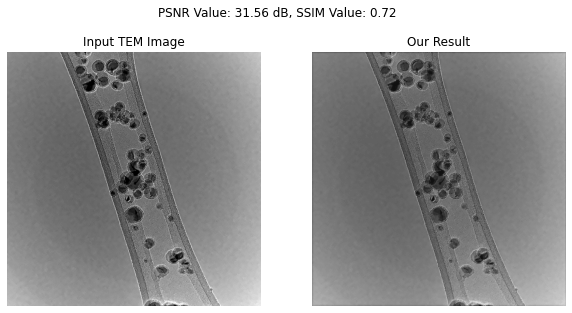

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import os

def calculate_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_ssim(image1, image2):
    ssim_value, _ = ssim(image1, image2, full=True)
    return ssim_value

def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def show_images_with_metrics(image_path1, folder_path, save_dir):
    img1 = load_image(image_path1)

    max_psnr_value = -1
    best_img_path = None
    best_img = None

    for filename in os.listdir(folder_path):
        image_path2 = os.path.join(folder_path, filename)
        if os.path.isfile(image_path2):
            img2 = load_image(image_path2)
            psnr_value = calculate_psnr(img1, img2)

            if psnr_value > max_psnr_value:
                max_psnr_value = psnr_value
                best_img_path = image_path2
                best_img = img2

    if best_img is not None:
        ssim_value = calculate_ssim(img1, best_img)

        plt.figure(figsize=(10, 5))

        # Display first image
        plt.subplot(1, 2, 1)
        plt.imshow(img1, cmap='gray')
        plt.title('Input TEM Image')
        plt.axis('off')

        # Display best matched image
        plt.subplot(1, 2, 2)
        plt.imshow(best_img, cmap='gray')
        plt.title('Our Result')
        plt.axis('off')

        plt.suptitle(f"PSNR Value: {max_psnr_value:.2f} dB, SSIM Value: {ssim_value:.2f}")

        # Save the figure
        save_path = os.path.join(save_dir, "Dataset_4_ESRGAN.jpg")
        plt.savefig(save_path)
        print(f"Image saved to {save_path}")

# Make sure the directory exists where you want to save the images
save_directory = 'Comparism Output'
os.makedirs(save_directory, exist_ok=True)

image_path1 = 'Datasets/RGB/Dataset_7/1.jpg'
folder_path = 'Output/Output_31_Dataset_7/ESRGAN'

show_images_with_metrics(image_path1, folder_path, save_directory)
